In [97]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [98]:
# Load dataset
data = pd.read_csv("../dataset/trains_refined_regression.csv")

# Feature extraction
X = data[['train_ID', 'departure_time', 'arrival_time', 'train_type']]
y = data['delay']

In [99]:
# Split datastes in trining and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Learn linear model

In [100]:
# Linear rergressor
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Model predictions
linear_y_pred = linear_model.predict(X_test)

In [101]:
# Results
print("--------------------- Linear Regression ---------------------\n")
print("MAE:", mean_absolute_error(y_test, linear_y_pred))
print("MSE:", mean_squared_error(y_test, linear_y_pred, squared=False))
print("R^2:",r2_score(y_test, linear_y_pred))
print("\n---------------------------------------------------------")

--------------------- Linear Regression ---------------------

MAE: 3.0300773250735205
MSE: 7.245390538407914
R^2: 0.0704820284110309

---------------------------------------------------------


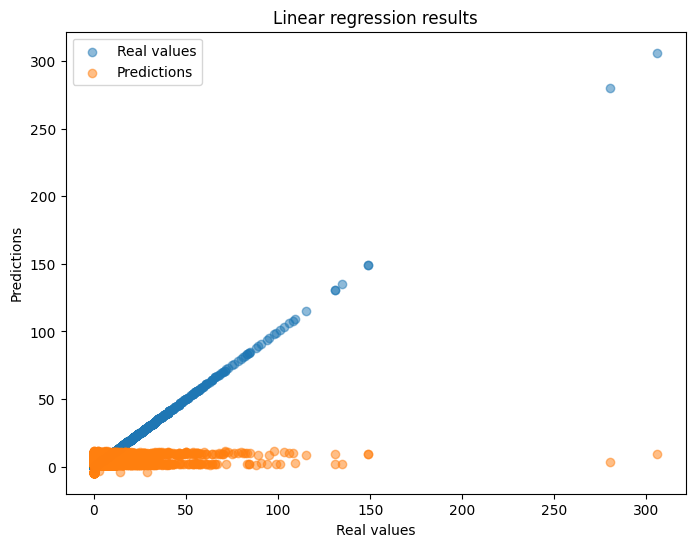

In [102]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, alpha=0.5, label="Real values")
plt.scatter(y_test, linear_y_pred, alpha=0.5, label="Predictions")
plt.xlabel("Real values")
plt.ylabel("Predictions")
plt.title("Linear regression results")
plt.legend()
plt.show()

## Learn random forest regressor model

In [103]:
# Random forest regressor
random_forest_model = RandomForestRegressor(n_estimators=35, random_state=42, criterion="squared_error")
random_forest_model.fit(X_train, y_train)

# Model predictions
random_forest_y_pred = random_forest_model.predict(X_test)

In [104]:
# Results
print("--------------------- Random Forest Regressor ---------------------\n")
print("MAE:", mean_absolute_error(y_test, random_forest_y_pred))
print("MSE:", mean_squared_error(y_test, random_forest_y_pred, squared=False))
print("R^2:",r2_score(y_test, random_forest_y_pred))
print("\n---------------------------------------------------------")

--------------------- Random Forest Regressor ---------------------

MAE: 1.2791064544825543
MSE: 4.861469948085568
R^2: 0.5815251112239977

---------------------------------------------------------


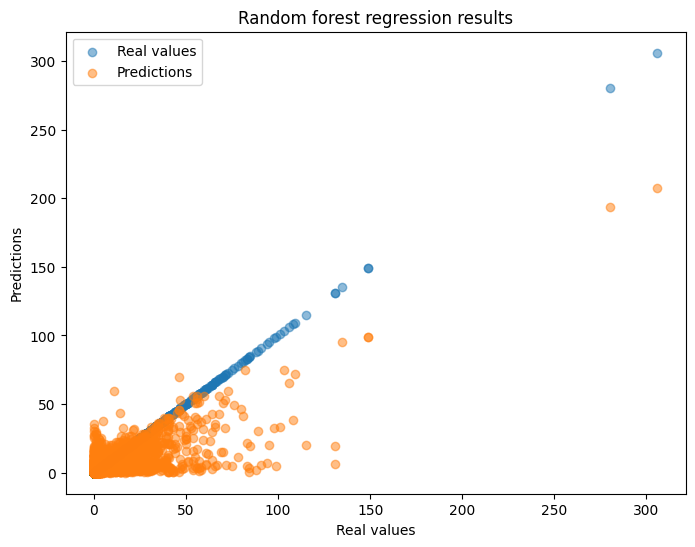

In [105]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, alpha=0.5, label="Real values")
plt.scatter(y_test, random_forest_y_pred, alpha=0.5, label="Predictions")
plt.xlabel("Real values")
plt.ylabel("Predictions")
plt.title("Random forest regression results")
plt.legend()
plt.show()

## Test models with new dataset

In [106]:
import warnings

test = pd.read_csv("../dataset/new_test_dataset.csv")

y_new_test = test["delay"].values

y_new_pred_linear = []
y_new_pred_forest = []


warnings.filterwarnings('ignore')
for index, row in test.iterrows():
    input_features = row[['train_ID', 'departure_time', 'arrival_time', 'train_type']]

    # Random forest model predictions
    prediction_linear = linear_model.predict([input_features]) 
    y_new_pred_linear.append(int(prediction_linear[0]))

    # Linear model predictions
    prediction_forest = random_forest_model.predict([input_features]) 
    y_new_pred_forest.append(int(prediction_forest[0]))

In [107]:
# Results
print("--------------------- Linear Regressor ---------------------\n")
print("MAE:", mean_absolute_error(y_new_test, y_new_pred_linear))
print("MSE:", mean_squared_error(y_new_test, y_new_pred_linear, squared=False))
print("R^2:",r2_score(y_new_test, y_new_pred_linear))
print("\n---------------------------------------------------------")

--------------------- Linear Regressor ---------------------

MAE: 3.1697635135135136
MSE: 8.398087378779863
R^2: 0.056120682844111314

---------------------------------------------------------


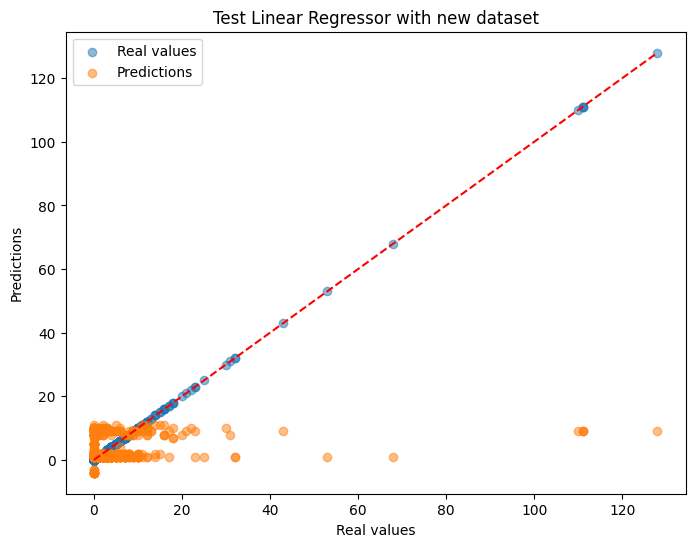

In [108]:
plt.figure(figsize=(8, 6))
plt.scatter(y_new_test, y_new_test, alpha=0.5, label="Real values")
plt.scatter(y_new_test, y_new_pred_linear, alpha=0.5, label="Predictions")
plt.plot([min(y_new_test), max(y_new_test)], [min(y_new_test), max(y_new_test)], color='red', linestyle='--')
plt.xlabel("Real values")
plt.ylabel("Predictions")
plt.title("Test Linear Regressor with new dataset")
plt.legend()
plt.show()


In [109]:
# Results
print("--------------------- Random Forest Regressor ---------------------\n")
print("MAE:", mean_absolute_error(y_new_test, y_new_pred_forest))
print("MSE:", mean_squared_error(y_new_test, y_new_pred_forest, squared=False))
print("R^2:",r2_score(y_new_test, y_new_pred_forest))
print("\n---------------------------------------------------------")

--------------------- Random Forest Regressor ---------------------

MAE: 1.9028716216216217
MSE: 7.413179917315273
R^2: 0.2645303211857708

---------------------------------------------------------


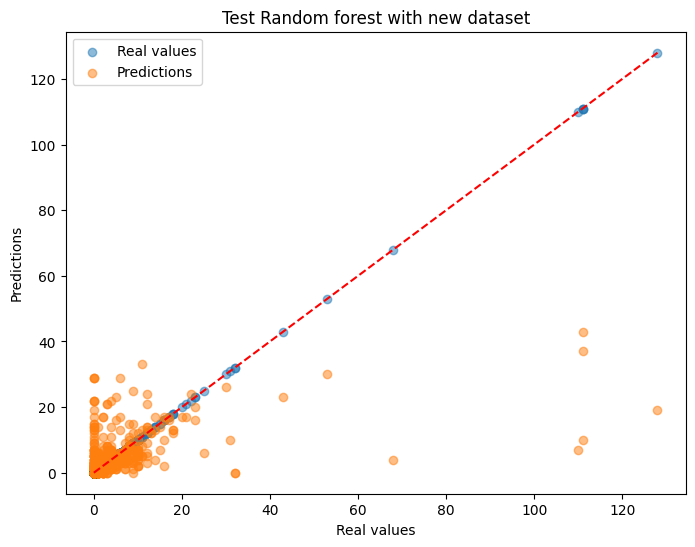

In [110]:
plt.figure(figsize=(8, 6))
plt.scatter(y_new_test, y_new_test, alpha=0.5, label="Real values")
plt.scatter(y_new_test, y_new_pred_forest, alpha=0.5, label="Predictions")
plt.plot([min(y_new_test), max(y_new_test)], [min(y_new_test), max(y_new_test)], color='red', linestyle='--')
plt.xlabel("Real values")
plt.ylabel("Predictions")
plt.title("Test Random forest with new dataset")
plt.legend()
plt.show()